In [1]:
import uproot4
import awkward1 as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep
import numba as nb
import h5py

In [2]:
help( ak.highlevel.Array )

Help on class Array in module awkward1.highlevel:

class Array(numpy.lib.mixins.NDArrayOperatorsMixin, awkward1._connect._pandas.PandasMixin)
 |  Array(data, behavior=None, with_name=None, check_valid=False)
 |  
 |  Args:
 |      data (#ak.layout.Content, #ak.Array, np.ndarray, str, or iterable):
 |          Data to wrap or convert into an array.
 |          If a NumPy array, the regularity of its dimensions is preserved
 |          and the data are viewed, not copied.
 |          If a string, the data are assumed to be JSON.
 |          If an iterable, calls #ak.from_iter, which assumes all dimensions
 |          have irregular lengths.
 |      behavior (None or dict): Custom #ak.behavior for this Array only.
 |      with_name (None or str): Gives tuples and records a name that can be
 |          used to override their behavior (see below).
 |      check_valid (bool): If True, verify that the #layout is valid.
 |  
 |  High-level array that can contain data of any type.
 |  
 |  For 

In [3]:
import os
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-Dilepton/190621_214154/")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0001")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160449/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPSp,.nGGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160355/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWWToJJMuNu_PtL-15_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160255/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWWToJJENu_PtL-15_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160227/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185019/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW8e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185049/0000")
#os.listdir("/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW2e-5_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185121/0000")

In [4]:
fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root"
#fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000/SlimmedNtuple_merged_0.root"
root_ = uproot4.open( fileName_ )
print ( "Number of events in tree: {}".format( np.array( root_["demo/SlimmedNtuple/event"] ).size ) )

tree_ = root_["demo/SlimmedNtuple"]
 
keys_nonproton = ["run", "event", "lumiblock", "nVertices",
                  "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
                  "pfcand_nextracks", "pfcand_nextracks_noDRl",
                  "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi"]
keys_nonproton.extend( tree_.keys( filter_name="jet*") )
keys_nonproton.extend( tree_.keys( filter_name="muon*") )
keys_nonproton.extend( tree_.keys( filter_name="met*") )
keys_proton = tree_.keys( filter_name="proton*")
keys_ppstrack = tree_.keys( filter_name="pps_track*")
keys = []
keys.extend( keys_nonproton )
keys.extend( keys_proton )
keys.extend( keys_ppstrack )
print ( keys )

#how_ = None
how_= "zip"

keys_remove = [ 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift2', 'proton_rpid2' ]
for key_ in keys_remove:
    if key_ in keys: keys.remove( key_ )
print ( keys )
arrays = tree_.arrays( keys, library="ak", how=how_, entry_stop=10 )
print ( "\n" )
print ( arrays )
print ( ak.to_list( arrays ) )

Number of events in tree: 5153
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'met', 'met_x', 'met_y', 'met_phi', 'proton_xi', 'proton_thx', 'proton_thy', 'proton_t', 'proton_ismultirp_', 'proton_rpid', 'proton_arm', 'pps_track_x', 'pps_track_y', 'pps_track_rpid']
['run', 'event', 'lumiblock', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptoni

In [5]:
if how_ == "zip":
    protons = arrays["proton"]
    protons["run"] = arrays["run"]
    protons["event"] = arrays["event"]
    protons["lumiblock"] = arrays["lumiblock"]
    ppstracks = arrays["pps_track"]
    ppstracks["run"] = arrays["run"]
    ppstracks["event"] = arrays["event"]
    ppstracks["lumiblock"] = arrays["lumiblock"]
    print ( protons )
    print ( ak.to_list(protons) )
    print ("\n")
    print ( ppstracks )
    print ( ak.to_list(ppstracks) )
else:
    arrays_proton = {}
    keys_ = keys_proton.copy()
    keys_remove = [ 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift2', 'proton_rpid2' ]
    for key_ in keys_remove:
        if key_ in keys_: keys_.remove( key_ )
    print ( keys_ )
    for key_ in keys_: arrays_proton[ key_[ len("proton_") : ] ] = arrays[ key_ ]
    print ( arrays_proton )
    protons = ak.zip( arrays_proton )
    print ( protons )
    print ( ak.to_list( protons ) )

[[], [{xi: 0.163, thx: 0, thy: -4.78e-05, ... event: 231206997, lumiblock: 158}]]
[[], [{'xi': 0.1628560870885849, 'thx': 0.0, 'thy': -4.7834317228989676e-05, 't': -0.10880425572395325, 'ismultirp': 0, 'rpid': 103, 'arm': -999, 'run': 297292, 'event': 161859812, 'lumiblock': 87}, {'xi': 0.16536220908164978, 'thx': 0.0, 'thy': -4.647077003028244e-05, 't': -0.10497827082872391, 'ismultirp': 0, 'rpid': 123, 'arm': -999, 'run': 297292, 'event': 161859812, 'lumiblock': 87}, {'xi': 0.14250442385673523, 'thx': 2.254578794236295e-05, 'thy': -9.03031905181706e-05, 't': -0.3346894681453705, 'ismultirp': 1, 'rpid': -999, 'arm': 1, 'run': 297292, 'event': 161859812, 'lumiblock': 87}], [{'xi': 0.030152760446071625, 'thx': 0.0, 'thy': -7.945497782202438e-05, 't': -0.25951042771339417, 'ismultirp': 0, 'rpid': 23, 'arm': -999, 'run': 297308, 'event': 7891746, 'lumiblock': 10}, {'xi': 0.04407980665564537, 'thx': 0.0, 'thy': 4.130245361011475e-05, 't': -0.07068534940481186, 'ismultirp': 0, 'rpid': 123, 

In [6]:
def create_table( fileNames, label, random_protons=False, resample_factor=-1, read_size="150MB", firstEvent=None, entryStop=None, debug=False ):

    fileNames_ = fileNames
    label_ = label
    random_protons_ = random_protons
    resample_factor_ = resample_factor
    read_size_ = read_size
    firstEvent_ = firstEvent
    entryStop_ = entryStop

    #how_ = None
    how_ = "zip"
    
    print ( "Random protons: {}".format( random_protons_ ) )
    
    resample = False
    if resample_factor_ > 1: resample = True
    print ( "Resample: {} / Resample factor: {}".format( resample,  resample_factor_ ) )

    np.random.seed( 42 )

    dset_chunk_size = 50000

    columns_protons = ( "run", "lumiblock", "event", "slice", "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm",
                        "jet0_pt", "jet0_eta", "jet0_phi", "jet0_energy", "jet0_mass", "jet0_corrmass", "jet0_tau1", "jet0_tau2", "jet0_vertexz",
                        "muon0_pt", "muon0_eta", "muon0_phi", "muon0_energy", "muon0_charge", "muon0_iso", "muon0_dxy", "muon0_dz",
                        "met", "met_x", "met_y", "met_phi",
                        "nVertices",
                        "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
                        "pfcand_nextracks", "pfcand_nextracks_noDRl",
                        "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi" )

    columns_ppstracks = ( "run", "lumiblock", "event", "slice", "x", "y", "rpid" ) 

    protons_keys = {}
    for col_ in columns_protons:
        protons_keys[ col_ ] = col_

    ppstracks_keys = {}
    for col_ in columns_ppstracks:
        ppstracks_keys[ col_ ] = col_

    counts_label_protons_ = "Proton" if not random_protons_ else "ProtonRnd"

    with h5py.File( 'output-' + label_ + '.h5', 'w') as f:

        dset_protons_multiRP = f.create_dataset( 'protons_multiRP', ( dset_chunk_size, len( columns_protons ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_protons ) ) )
        print ( "Initial dataset shape: {}".format( dset_protons_multiRP.shape ) )

        dset_protons_singleRP = f.create_dataset( 'protons_singleRP', ( dset_chunk_size, len( columns_protons ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_protons ) ) )
        print ( "Initial dataset shape: {}".format( dset_protons_singleRP.shape ) )

        dset_ppstracks = f.create_dataset( 'ppstracks', ( dset_chunk_size, len( columns_ppstracks ) ), compression="gzip", chunks=True, maxshape=( None , len( columns_ppstracks ) ) )
        print ( "Initial dataset shape: {}".format( dset_ppstracks.shape ) )

        protons_multiRP_list = {}
        for col_ in columns_protons:
            protons_multiRP_list[ col_ ] = []           

        protons_singleRP_list = {}
        for col_ in columns_protons:
            protons_singleRP_list[ col_ ] = []           

        ppstracks_list = {}
        for col_ in columns_ppstracks:
            ppstracks_list[ col_ ] = []           

        selections = None
        counts = None

        dset_multiRP_slice = 0
        dset_multiRP_idx = 0
        dset_multiRP_entries = 0

        dset_singleRP_slice = 0
        dset_singleRP_idx = 0
        dset_singleRP_entries = 0

        dset_ppstracks_slice = 0
        dset_ppstracks_idx = 0
        dset_ppstracks_entries = 0

        for file_ in fileNames_:
            print ( file_ ) 
            root_ = uproot4.open( file_ )

            print ( "Number of events in tree: {}".format( np.array( root_["demo/SlimmedNtuple/event"] ).size ) )

            tree_ = root_["demo/SlimmedNtuple"]

            keys_nonproton = [ "run", "event", "lumiblock", "nVertices",
                               "num_bjets_ak8", "num_bjets_ak4", "num_jets_ak4",
                               "pfcand_nextracks", "pfcand_nextracks_noDRl",
                               "recoMWhad", "recoMWlep", "recoMWW", "recoRapidityWW", "dphiWW", "WLeptonicPt", "WLeptonicPhi" ]
            keys_nonproton.extend( tree_.keys( filter_name="jet*") )
            keys_nonproton.extend( tree_.keys( filter_name="muon*") )
            keys_nonproton.extend( tree_.keys( filter_name="met*") )
            keys = []
            keys.extend( keys_nonproton )
            keys.extend( tree_.keys( filter_name="proton*") )
            keys.extend( tree_.keys( filter_name="pps*") )
            keys_remove = [ 'proton_trackx2', 'proton_tracky2', 'proton_trackpixshift2', 'proton_rpid2' ]
            for key_ in keys_remove:
                if key_ in keys: keys.remove( key_ )
            print ( keys )

            for events_ in tree_.iterate( keys , library="ak", how=how_, step_size=read_size_, entry_start=firstEvent_, entry_stop=entryStop_ ):
                print ( len(events_), events_ )
                print ( "Num jets: {}".format( ak.num( events_["jet"] ) ) )
                print ( "Num muons: {}".format( ak.num( events_["muon"] ) ) )
                print ( "Num protons: {}".format( ak.num( events_["proton"] ) ) )
                print ( "Num pps tracks: {}".format( ak.num( events_["pps_track"] ) ) )

                selections_ = []
                counts_ = []

                selections_.append( "All" )
                counts_.append( len( events_ ) )

                # Event selections
                msk_1jet = ( ak.num( events_["jet"] ) >= 1 )
                selections_.append( "Jet" )
                counts_.append( np.sum( np.array( msk_1jet ).astype("int32") ) )

                msk_1muon = msk_1jet & ( ak.num( events_["muon"] ) >= 1 )
                selections_.append( "Muon" )
                counts_.append( np.sum( np.array( msk_1muon ).astype("int32") ) )

                events_ = events_[ msk_1muon ]    

                selections_ = np.array( selections_ )
                counts_ = np.array( counts_ )

                # Repeat events by resample factor
                if resample:
                    counts_ = counts_ * resample_factor_

                if selections is None:
                    selections = selections_
                    counts = counts_
                else:
                    msk_selections = np.full_like( selections, False, dtype='bool' )
                    for key in selections_:
                        msk_selections |= ( selections == key )
                    counts[ msk_selections ] += counts_

                # Repeat events by resample factor
                slices_ = np.zeros( len( events_ ), dtype=np.int32 )
                if resample:
                    events_size_ = len( events_ )
                    events_ = ak.concatenate( ( [events_] * resample_factor_ ), axis=0 )
                    slices_ = np.zeros( resample_factor_ * events_size_, dtype=np.int32 )
                    for idx_ in range( resample_factor_ ):
                        slices_[ ( idx_ * events_size_ ) : ( ( idx_ + 1 ) * events_size_ ) ] = idx_

                events_[ "slice" ] = slices_

                # Randomize proton arrays
                #protons_ = events_["proton"]
                protons_ = None
                ppstracks_ = None
                if random_protons_:
                    protons_ = events_["proton"]
                    ppstracks_ = events_["pps_track"]

                    index_rnd_ = np.random.permutation( len( events_ ) )

                    protons_rnd_ = protons_[ index_rnd_ ]
                    ppstracks_rnd_ = ppstracks_[ index_rnd_ ]

                    events_[ "proton_rnd" ] = protons_rnd_
                    events_[ "pps_track_rnd" ] = ppstracks_rnd_

                    print ( "Num protons: {}".format( ak.num( events_["proton"] ) ) )
                    print ( "Num protons randomized: {}".format( ak.num( events_["proton_rnd"] ) ) )
                    print ( "Num pps tracks: {}".format( ak.num( events_["pps_track"] ) ) )
                    print ( "Num pps tracks randomized: {}".format( ak.num( events_["pps_track_rnd"] ) ) )

                if not random_protons_:
                    protons_ = events_["proton"]
                    ppstracks_ = events_["pps_track"]
                else:
                    protons_ = events_["proton_rnd"]
                    ppstracks_ = events_["pps_track_rnd"]
                    
                print ( "Num protons: {}".format( ak.num( protons_ ) ) )
                print ( "Num pps tracks: {}".format( ak.num( ppstracks_ ) ) )

                protons_["run"]                    = events_["run"]
                protons_["lumiblock"]              = events_["lumiblock"]
                protons_["event"]                  = events_["event"]
                protons_["slice"]                  = events_["slice"]
                protons_["jet0_pt"]                = events_.jet.pt[:,0]
                protons_["jet0_eta"]               = events_.jet.eta[:,0]
                protons_["jet0_phi"]               = events_.jet.phi[:,0]
                protons_["jet0_energy"]            = events_.jet.energy[:,0]
                protons_["jet0_mass"]              = events_.jet.mass[:,0]
                protons_["jet0_corrmass"]          = events_.jet.corrmass[:,0]
                protons_["jet0_tau1"]              = events_.jet.tau1[:,0]
                protons_["jet0_tau2"]              = events_.jet.tau2[:,0]
                protons_["jet0_vertexz"]           = events_.jet.vertexz[:,0]
                protons_["muon0_pt"]               = events_.muon.pt[:,0]
                protons_["muon0_eta"]              = events_.muon.eta[:,0]
                protons_["muon0_phi"]              = events_.muon.phi[:,0]
                protons_["muon0_energy"]           = events_.muon.e[:,0]
                protons_["muon0_charge"]           = events_.muon.charge[:,0]
                protons_["muon0_iso"]              = events_.muon.iso[:,0]
                protons_["muon0_dxy"]              = events_.muon.dxy[:,0]
                protons_["muon0_dz"]               = events_.muon.dz[:,0]
                protons_["met"]                    = events_["met"]
                protons_["met_x"]                  = events_["met_x"]
                protons_["met_y"]                  = events_["met_y"]
                protons_["met_phi"]                = events_["met_phi"]
                protons_["nVertices"]              = events_["nVertices"]
                protons_["num_bjets_ak8"]          = events_["num_bjets_ak8"]
                protons_["num_bjets_ak4"]          = events_["num_bjets_ak4"]
                protons_["num_jets_ak4"]           = events_["num_jets_ak4"]
                protons_["pfcand_nextracks"]       = events_["pfcand_nextracks"]
                protons_["pfcand_nextracks_noDRl"] = events_["pfcand_nextracks_noDRl"]
                protons_["recoMWhad"]              = events_["recoMWhad"]
                protons_["recoMWlep"]              = events_["recoMWlep"]
                protons_["recoMWW"]                = events_["recoMWW"]
                protons_["recoRapidityWW"]         = events_["recoRapidityWW"]
                protons_["dphiWW"]                 = events_["dphiWW"]
                protons_["WLeptonicPt"]            = events_["WLeptonicPt"]
                protons_["WLeptonicPhi"]           = events_["WLeptonicPhi"]
                #protons_["x1"] = -999.
                #protons_["y1"] = -999.
                #protons_["x2"] = -999.
                #protons_["y2"] = -999.
                
                #ppstracks_ = events_["pps_track"]
                ppstracks_["run"] = events_["run"]
                ppstracks_["lumiblock"] = events_["lumiblock"]
                ppstracks_["event"] = events_["event"]
                ppstracks_["slice"] = events_["slice"]

                protons_singleRP_ = protons_[ protons_.ismultirp == 0 ]
                protons_multiRP_ = protons_[ protons_.ismultirp == 1 ]

                protons_singleRP_byRP_ = {}
                ppstracks_byRP_ = {}
                protons_multiRP_byArm_ = {}
                for rpid in ( 3, 23, 103, 123 ):
                    #arm = -1
                    #if   rpid == 3   or rpid == 23 : arm = 0
                    #elif rpid == 103 or rpid == 123 : arm = 1
                    #print ( "Arm: {}".format( arm ) )

                    protons_singleRP_byRP_[ rpid ] =  protons_singleRP_[ protons_singleRP_.rpid == rpid ]
                    ppstracks_byRP_[ rpid ] = ppstracks_[ ppstracks_.rpid == rpid ]
                    #protons_singleRP_byRP_[ rpid ]["x1"] = ppstracks_byRP_[ rpid ].x
                    #protons_singleRP_byRP_[ rpid ]["y1"] = ppstracks_byRP_[ rpid ].y

                    print ( "\nNum protons RP {}: {}".format( rpid, ak.num( protons_singleRP_byRP_[ rpid ] ) ) )
                    if debug:
                        print ( ak.to_list( protons_singleRP_byRP_[ rpid ] ) )
                        print ("\n")
                        print ( ak.to_list( ppstracks_byRP_[ rpid ] ) )

                for arm in ( 0, 1 ):
                    protons_multiRP_byArm_[ arm ] = protons_multiRP_[ protons_multiRP_.arm == arm ]

                    print ( "\nNum multi-RP protons Arm {}: {}".format( arm, ak.num( protons_multiRP_byArm_[ arm ] ) ) )
                    if debug:
                        print ( ak.to_list( protons_multiRP_byArm_[ arm ] ) )

                #msk  =  np.array( ak.num( protons_singleRP_byRP_[ 3 ].xi ) == 1 )
                #msk &= np.array( ak.num( protons_singleRP_byRP_[ 23 ].xi ) == 1 )
                #msk &= np.array( ak.num( protons_singleRP_byRP_[ 103 ].xi ) == 1 )
                #msk &= np.array( ak.num( protons_singleRP_byRP_[ 123 ].xi ) == 1 )    

                msk_protons  = np.array( ak.num( protons_multiRP_byArm_[ 0 ] ) > 0 )
                msk_protons &= np.array( ak.num( protons_multiRP_byArm_[ 1 ] ) > 0 )

                protons_multiRP_sel_ = protons_multiRP_[ msk_protons ]
                protons_singleRP_sel_ = protons_singleRP_[ msk_protons ]
                ppstracks_sel_ = ppstracks_[ msk_protons ]
                print ("\n")
                if debug:
                    print ( msk_protons )
                print ( len( protons_multiRP_sel_ ) )
                print ( ak.num( protons_multiRP_sel_ ) )
                if debug:
                    print ("\n")
                    print ( ak.to_list( protons_multiRP_sel_ ) )
                    print ("\n")
                    print ( ak.to_list( protons_singleRP_sel_ ) )
                    print ("\n")
                    print ( ak.to_list( ppstracks_sel_ ) )

                counts_protons_ = len( protons_[ msk_protons ] )
                if not counts_label_protons_ in selections:
                    selections = np.concatenate( ( selections, np.array( [ counts_label_protons_ ] ) ) )
                    counts = np.concatenate( ( counts, np.array( [counts_protons_] ) ) )
                else:    
                    counts[ selections == counts_label_protons_ ] += counts_protons_ 

                print ( selections )
                print ( counts )

                for col_ in columns_protons:
                    protons_multiRP_list[ col_ ] = np.array( ak.flatten( protons_multiRP_sel_[ protons_keys[ col_ ] ] ) )

                arr_size_multiRP_ = len( protons_multiRP_list[ "xi" ] )
                print ( "Flattened array size multi-RP: {}".format( arr_size_multiRP_ ) )

                for col_ in columns_protons:
                    protons_singleRP_list[ col_ ] = np.array( ak.flatten( protons_singleRP_sel_[ protons_keys[ col_ ] ] ) )

                arr_size_singleRP_ = len( protons_singleRP_list[ "xi" ] )
                print ( "Flattened array size single-RP: {}".format( arr_size_singleRP_ ) )

                for col_ in columns_ppstracks:
                    ppstracks_list[ col_ ] = np.array( ak.flatten( ppstracks_sel_[ ppstracks_keys[ col_ ] ] ) )

                arr_size_ppstracks_ = len( ppstracks_list[ "x" ] )
                print ( "Flattened array size tracks: {}".format( arr_size_ppstracks_ ) )

                dset_multiRP_entries += arr_size_multiRP_
                dset_singleRP_entries += arr_size_singleRP_
                dset_ppstracks_entries += arr_size_ppstracks_

                if dset_multiRP_entries > dset_chunk_size:
                    resize_factor_ = ( dset_multiRP_entries // dset_chunk_size )
                    chunk_resize_  = resize_factor_ * dset_chunk_size

                    print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
                    dset_protons_multiRP.resize( ( dset_protons_multiRP.shape[0] + chunk_resize_ ), axis=0 )
                    print ( "Dataset shape: {}".format( dset_protons_multiRP.shape ) )

                    dset_multiRP_slice += resize_factor_
                    # Count the rest to the chunk size 
                    dset_multiRP_entries = ( dset_multiRP_entries % dset_chunk_size )

                if dset_singleRP_entries > dset_chunk_size:
                    resize_factor_ = ( dset_singleRP_entries // dset_chunk_size )
                    chunk_resize_  = resize_factor_ * dset_chunk_size

                    print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
                    dset_protons_singleRP.resize( ( dset_protons_singleRP.shape[0] + chunk_resize_ ), axis=0 )
                    print ( "Dataset shape: {}".format( dset_protons_singleRP.shape ) )

                    dset_singleRP_slice += resize_factor_
                    # Count the rest to the chunk size 
                    dset_singleRP_entries = ( dset_singleRP_entries % dset_chunk_size )

                if dset_ppstracks_entries > dset_chunk_size:
                    resize_factor_ = ( dset_ppstracks_entries // dset_chunk_size )
                    chunk_resize_  = resize_factor_ * dset_chunk_size

                    print ( "Resizing output dataset by {} entries.".format( chunk_resize_ ) )
                    dset_ppstracks.resize( ( dset_ppstracks.shape[0] + chunk_resize_ ), axis=0 )
                    print ( "Dataset shape: {}".format( dset_ppstracks.shape ) )

                    dset_ppstracks_slice += resize_factor_
                    # Count the rest to the chunk size 
                    dset_ppstracks_entries = ( dset_ppstracks_entries % dset_chunk_size )

                print ( "Stacking data." )
                data_protons_multiRP_ = np.stack( list( protons_multiRP_list.values() ), axis=1 )
                print ( data_protons_multiRP_.shape )
                print ( data_protons_multiRP_ )

                data_protons_singleRP_ = np.stack( list( protons_singleRP_list.values() ), axis=1 )
                print ( data_protons_singleRP_.shape )
                print ( data_protons_singleRP_ )

                data_ppstracks_ = np.stack( list( ppstracks_list.values() ), axis=1 )
                print ( data_ppstracks_.shape )
                print ( data_ppstracks_ )

                dset_idx_next_ = dset_multiRP_idx + arr_size_multiRP_
                print ( "Slice: {}".format( dset_multiRP_slice ) )
                print ( "Writing in positions ({},{})".format( dset_multiRP_idx, dset_idx_next_ ) )
                dset_protons_multiRP[ dset_multiRP_idx : dset_idx_next_ ] = data_protons_multiRP_
                dset_multiRP_idx = dset_idx_next_ 

                dset_idx_next_ = dset_singleRP_idx + arr_size_singleRP_
                print ( "Slice: {}".format( dset_singleRP_slice ) )
                print ( "Writing in positions ({},{})".format( dset_singleRP_idx, dset_idx_next_ ) )
                dset_protons_singleRP[ dset_singleRP_idx : dset_idx_next_ ] = data_protons_singleRP_
                dset_singleRP_idx = dset_idx_next_ 

                dset_idx_next_ = dset_ppstracks_idx + arr_size_ppstracks_
                print ( "Slice: {}".format( dset_ppstracks_slice ) )
                print ( "Writing in positions ({},{})".format( dset_ppstracks_idx, dset_idx_next_ ) )
                dset_ppstracks[ dset_ppstracks_idx : dset_idx_next_ ] = data_ppstracks_
                dset_ppstracks_idx = dset_idx_next_ 

            # Iteration on input files
            root_.close()

        # Reduce dataset to its final size 
        print ( "Reduce dataset." )
        dset_protons_multiRP.resize( ( dset_multiRP_idx ), axis=0 ) 
        print ( "Dataset shape: {}".format( dset_protons_multiRP.shape ) )

        dset_protons_singleRP.resize( ( dset_singleRP_idx ), axis=0 ) 
        print ( "Dataset shape: {}".format( dset_protons_singleRP.shape ) )

        dset_ppstracks.resize( ( dset_ppstracks_idx ), axis=0 ) 
        print ( "Dataset shape: {}".format( dset_ppstracks.shape ) )

        print ( "Writing column names and event counts.")

        columns_protons_ = np.array( columns_protons, dtype='S' )
        print ( columns_protons_ )

        columns_ppstracks_ = np.array( columns_ppstracks, dtype='S' )
        print ( columns_ppstracks_ )

        event_counts_ = counts
        print ( event_counts_ )

        selections_ = np.array( selections, dtype='S' )
        print ( selections_ )

        dset_columns_protons = f.create_dataset( 'columns_protons', data=columns_protons_ )
        dset_columns_ppstracks = f.create_dataset( 'columns_ppstracks', data=columns_ppstracks_ )
        dset_counts = f.create_dataset( 'event_counts', data=event_counts_ )
        dset_selections = f.create_dataset( 'selections', data=selections_ )

        print ( dset_protons_multiRP )
        print ( dset_protons_multiRP[-1] )
        print ( dset_protons_singleRP )
        print ( dset_protons_singleRP[-1] )   
        print ( dset_ppstracks )
        print ( dset_ppstracks[-1] )   

        print ( dset_columns_protons )
        print ( list( dset_columns_protons ) )
        print ( dset_columns_ppstracks )
        print ( list( dset_columns_ppstracks ) )   
        print ( dset_counts )
        print ( list( dset_counts ) )
        print ( dset_selections )
        print ( list( dset_selections ) )


In [7]:
run_tables = False

In [8]:
debug = False

fileNames_A0W_ACW = {}
fileNames_A0W_ACW[ "A0W1e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160422/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "A0W2e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160449/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "A0W5e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200420_160355/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "ACW5e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW5e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185019/0000/SlimmedNtuple_1.root"
]
fileNames_A0W_ACW[ "ACW8e-6" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW8e-6_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185049/0000/SlimmedNtuple_merged_0.root"
]
fileNames_A0W_ACW[ "ACW2e-5" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/GGToWW_bSM-ACW2e-5_13TeV-fpmc-herwig6-signal-proton-propagation-dilepton/200424_185121/0000/SlimmedNtuple_merged_0.root"
]

firstEvent = None
entryStop = None
read_size = "150MB"

if run_tables:
    for key_ in fileNames_A0W_ACW:
        print ( key_, fileNames_A0W_ACW[ key_ ] )
        label = "GGToWW-AQGC-test-" + key_
        create_table( fileNames_A0W_ACW[ key_ ], label=label, random_protons=False, resample_factor=-1, read_size=read_size, firstEvent=firstEvent, entryStop=entryStop, debug=debug )
        

In [9]:
debug = False

fileNames_data = {}
fileNames_data[ "2017B" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017B-Dilepton/190621_214052/0000/SlimmedNtuple_merged_0.root"
]
fileNames_data[ "2017C" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017C-Dilepton/190621_214124/0000/SlimmedNtuple_merged_1.root"
]
fileNames_data[ "2017D" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017D-Dilepton/190621_214154/SlimmedNtuple_merged_0.root"
]
fileNames_data[ "2017E" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017E-Dilepton/190621_214224/0000/SlimmedNtuple_merged_1.root"
]
fileNames_data[ "2017F" ] = [
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000/SlimmedNtuple_merged_0.root",
    "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0000/SlimmedNtuple_merged_1.root"
    #"/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2017F-Dilepton/190621_214253/0001/SlimmedNtuple_merged_0.root"
]

label = "data-test"
#label = "data-random-resample_20-test"
firstEvent = None
entryStop = None
read_size = "150MB"
random_protons = False
resample_factor = -1
#random_protons = True
#resample_factor = 20

if run_tables:
    for key_ in fileNames_data:
        print ( key_, fileNames_data[ key_ ] )
        label_ = "{}-{}".format( label, key_ )
        create_table( fileNames_data[ key_ ], label=label_, random_protons=random_protons, resample_factor=resample_factor, read_size=read_size, firstEvent=firstEvent, entryStop=entryStop, debug=debug )
        

In [10]:
debug = False

label = "data-random-resample_20-test"
firstEvent = None
entryStop = None
read_size = "150MB"
random_protons = True
resample_factor = 20

if run_tables:
    for key_ in fileNames_data:
        print ( key_, fileNames_data[ key_ ] )
        label_ = "{}-{}".format( label, key_ )
        create_table( fileNames_data[ key_ ], label=label_, random_protons=random_protons, resample_factor=resample_factor, read_size=read_size, firstEvent=firstEvent, entryStop=entryStop, debug=debug )
        

In [11]:
def get_data( fileNames ):
    df_protons_multiRP_list = []
    df_protons_singleRP_list = []
    df_ppstracks_list = []
    df_counts_list = []

    for file_ in fileNames:
        print ( file_ )
        with h5py.File( file_, 'r' ) as f:
            print ( list(f.keys()) )

            dset_protons_multiRP = f['protons_multiRP']
            print ( dset_protons_multiRP.shape )
            print ( dset_protons_multiRP[:,:] )

            dset_protons_singleRP = f['protons_singleRP']
            print ( dset_protons_singleRP.shape )
            print ( dset_protons_singleRP[:,:] )

            dset_ppstracks = f['ppstracks']
            print ( dset_ppstracks.shape )
            print ( dset_ppstracks[:,:] )

            dset_columns_protons = f['columns_protons']
            print ( dset_columns_protons.shape )
            columns_protons = list( dset_columns_protons )
            print ( columns_protons )
            columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
            print ( columns_protons_str )

            dset_columns_ppstracks = f['columns_ppstracks']
            print ( dset_columns_ppstracks.shape )
            columns_ppstracks = list( dset_columns_ppstracks )
            print ( columns_ppstracks )
            columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
            print ( columns_ppstracks_str )

            dset_selections = f['selections']
            selections_ = [ item.decode("utf-8") for item in dset_selections ]
            print ( selections_ )

            dset_counts = f['event_counts']
            df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
            print ( df_counts_list[-1] )

            chunk_size = 1000000
            entries_protons_multiRP = dset_protons_multiRP.shape[0]
            start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_protons_multiRP )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                          "muon0_charge": "int32",
                                          "nVertices": "int32",
                                          "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                          "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
                df_protons_multiRP_list.append( df_ )
                print ( df_protons_multiRP_list[-1].head() )
                print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

            entries_protons_singleRP = dset_protons_singleRP.shape[0]
            start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_protons_singleRP )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                          "muon0_charge": "int32",
                                          "nVertices": "int32",
                                          "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                          "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
                df_protons_singleRP_list.append( df_ )
                print ( df_protons_singleRP_list[-1].head() )
                print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

            entries_ppstracks = dset_ppstracks.shape[0]
            start_ = list( range( 0, entries_ppstracks, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_ppstracks )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
                df_ppstracks_list.append( df_ )
                print ( df_ppstracks_list[-1].head() )
                print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

    df_counts = df_counts_list[0]
    for idx in range( 1, len( df_counts_list ) ):
        df_counts = df_counts.add( df_counts_list[idx] )
    print ( df_counts )

    df_protons_multiRP = pd.concat( df_protons_multiRP_list )
    print (df_protons_multiRP)

    df_protons_singleRP = pd.concat( df_protons_singleRP_list )
    print (df_protons_singleRP)

    df_ppstracks = pd.concat( df_ppstracks_list )
    print (df_ppstracks)
    
    return ( df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks )
    

In [12]:
fileNames_data = [
    'output-data-test-2017B.h5',
    'output-data-test-2017C.h5',
    'output-data-test-2017D.h5',
    'output-data-test-2017E.h5',
    'output-data-test-2017F.h5'
]

df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks = get_data( fileNames_data )

output-data-test-2017B.h5
['columns_ppstracks', 'columns_protons', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(406, 45)
[[ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1643302e+08 ... -2.8607266e+00
   2.6875125e+02 -2.5549490e+00]
 ...
 [ 2.9721500e+05  1.8000000e+01  2.9543426e+07 ... -3.0179429e+00
   2.1841402e+02 -2.7146516e+00]
 [ 2.9711400e+05  1.5500000e+02  2.6446400e+08 ...  3.0653708e+00
   4.6712457e+02  2.0573792e+00]
 [ 2.9711400e+05  1.5500000e+02  2.6446400e+08 ...  3.0653708e+00
   4.6712457e+02  2.0573792e+00]]
(812, 45)
[[ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  

[b'run', b'lumiblock', b'event', b'slice', b'xi', b'thx', b'thy', b't', b'ismultirp', b'rpid', b'arm', b'jet0_pt', b'jet0_eta', b'jet0_phi', b'jet0_energy', b'jet0_mass', b'jet0_corrmass', b'jet0_tau1', b'jet0_tau2', b'jet0_vertexz', b'muon0_pt', b'muon0_eta', b'muon0_phi', b'muon0_energy', b'muon0_charge', b'muon0_iso', b'muon0_dxy', b'muon0_dz', b'met', b'met_x', b'met_y', b'met_phi', b'nVertices', b'num_bjets_ak8', b'num_bjets_ak4', b'num_jets_ak4', b'pfcand_nextracks', b'pfcand_nextracks_noDRl', b'recoMWhad', b'recoMWlep', b'recoMWW', b'recoRapidityWW', b'dphiWW', b'WLeptonicPt', b'WLeptonicPhi']
['run', 'lumiblock', 'event', 'slice', 'xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 'met', 'met_x', 'met_y', 'met_phi', 'nVertices', 'num_bjets_ak8', 'num

      run  lumiblock       event  slice        xi       thx           thy  \
0  305840        862  1482531456      0  0.113404 -0.000034 -5.539081e-05   
1  305840        862  1482531456      0  0.134408 -0.000033 -7.831301e-06   
2  306126        412   252723136      0  0.126572 -0.000035  5.602982e-05   
3  306126        412   252723136      0  0.082098 -0.000011  1.316482e-08   
4  305377       1008  1860775424      0  0.125135 -0.000037  7.255395e-05   

          t  ismultirp  rpid  ...  num_jets_ak4  pfcand_nextracks  \
0 -0.169852          1  -999  ...             0                28   
1 -0.060977          1  -999  ...             0                28   
2 -0.178189          1  -999  ...             1                32   
3 -0.010846          1  -999  ...             1                32   
4 -0.260172          1  -999  ...             3                33   

   pfcand_nextracks_noDRl  recoMWhad   recoMWlep     recoMWW  recoRapidityWW  \
0                      28  64.453247   87.

In [13]:
df_protons_multiRP[ ['run', 'lumiblock', 'event', 'slice'] ]

,run,lumiblock,event,slice
0,297411,205,316223040,0
1,297411,205,316223040,0
2,297411,205,316433024,0
3,297411,205,316433024,0
4,297101,370,500976032,0
5,297101,370,500976032,0
6,297101,505,668369216,0
7,297101,505,668369216,0
8,297219,787,1425137280,0
9,297219,787,1425137280,0


In [14]:
df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )
df_protons_multiRP_index

xi           thx           thy  \
run    lumiblock event      slice                                         
297411 205       316223040  0      0.112909 -1.138678e-05 -2.359810e-07   
                            0      0.142016 -5.927520e-05 -5.139783e-05   
                 316433024  0      0.047672  3.475338e-07 -1.551688e-04   
                            0      0.053283 -2.594476e-05  1.662401e-05   
297101 370       500976032  0      0.074480  5.845811e-05 -9.597090e-05   
                            0      0.091005 -2.822397e-05 -3.234632e-05   
       505       668369216  0      0.125338  1.634835e-05 -4.860549e-06   
                            0      0.126938  8.313224e-06 -1.064668e-06   
297219 787       1425137280 0      0.111469  4.793925e-05  3.160608e-06   
                            0      0.080245 -1.801980e-06  2.290369e-05   
297050 403       500993152  0      0.130760  1.028559e-05  1.911068e-04   
                            0      0.065475  8.072794e-05 -3.959778e-05   
297178 697       870605696  0      0.049976 -8.912014e-05 -9.530537e-05   
                            0      0.135665 -1.776611e-05 -5.981235e-05   
297101 862       1071033536 0      0.093559  3.419771e-05  2.691704e-05   
                            0      0.074372  9.880331e-05  2.958092e-05   
       911       1123641728 0      0.049856 -1.893342e-05 -2.462520e-05   
                            0      0.071347 -3.894152e-06  4.081367e-05   
297178 666       840800256  0      0.116242  1.738557e-06 -1.372357e-05   
                            0      0.102898 -5.345756e-05  1.810795e-05   
       766       946702848  0      0.131125 -1.095593e-06  8.948083e-05   
                            0      0.129157 -3.779837e-06  6.084369e-05   
298996 207       220344592  0      0.134261 -1.246158e-05 -1.093036e-05   
                            0      0.071990 -1.849198e-05  2.471780e-05   
297178 266       361288608  0      0.128542  3.092448e-05  5.876295e-05   
                            0      0.098105 -5.829912e-05  2.748324e-05   
297292 250       454772416  0      0.075780 -2.951101e-05 -1.372629e-04   
                            0      0.113376 -3.574970e-05 -9.167629e-05   
297219 119       246229344  0      0.081896 -7.497543e-06  2.201788e-05   
                            0      0.078645 -5.768395e-05 -3.655407e-05   
...                                     ...           ...           ...   
306092 405       760614208  0      0.095498 -4.137292e-05  2.226372e-05   
                            0      0.149806  2.997934e-06  2.208685e-05   
305046 93        106393128  0      0.050357 -6.092811e-05 -1.721245e-04   
                            0      0.143401  1.047580e-05 -2.039529e-05   
305064 580       929028928  0      0.068198 -4.059573e-05 -7.625236e-06   
                            0      0.116528 -7.010249e-06 -3.417816e-05   
306048 26        49603400   0      0.090315  3.406277e-07  6.261190e-05   
                            0      0.193375 -1.159232e-04  8.489928e-05   
306030 38        76541464   0      0.079988  2.000039e-05 -7.230146e-05   
                            0      0.135225  8.650458e-05  6.217066e-06   
306135 1072      1931327232 0      0.132957  1.083821e-05  1.591701e-04   
                            0      0.073327 -6.942642e-05  6.009623e-05   
305046 115       130269968  0      0.063273  2.913345e-05  9.772697e-05   
                            0      0.090076  1.577819e-05  9.869810e-06   
306125 2403      3555737088 0      0.036247 -1.896777e-05 -1.858289e-04   
                            0      0.079319  1.274114e-05 -7.590629e-05   
306139 24        20476824   0      0.076159  4.144529e-05 -9.082774e-06   
                            0      0.153744 -1.146563e-05  2.868243e-05   
305252 162       200564864  0      0.094314  2.925674e-05  4.006570e-05   
                            0      0.046108  7.488381e-05  7.768979e-05   
306092 361       680397120  0      0.097000  4.299239e-05  7.02608

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9b3994350>],
      dtype=object)

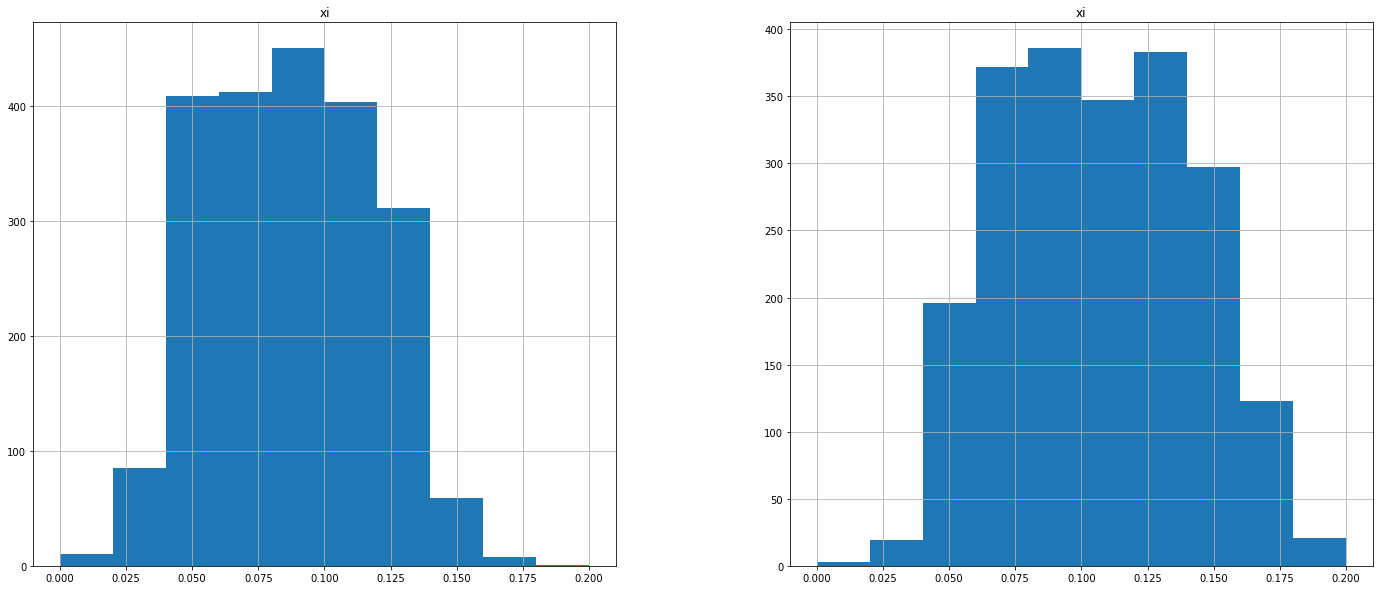

In [15]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP[ df_protons_multiRP.arm == 0 ].hist( "xi", bins=10, range=(0.,0.2), ax=axes[0] )
df_protons_multiRP[ df_protons_multiRP.arm == 1 ].hist( "xi", bins=10, range=(0.,0.2), ax=axes[1] )

In [16]:
df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]
df_protons_multiRP_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297411 205       316223040  0      218.068756  0.504739 -3.034295   
                 316433024  0      384.878784  2.095394  0.305777   
297101 370       500976032  0      331.734375 -0.850632  3.026100   
       505       668369216  0      206.841949 -2.248741 -1.192259   
297219 787       1425137280 0      209.280380  0.742523 -0.572275   
297050 403       500993152  0      228.137985 -0.510389  1.531566   
297178 697       870605696  0      224.234421  0.378060  0.127324   
297101 862       1071033536 0      206.248505 -1.086584  0.800201   
       911       1123641728 0      202.618423  1.455921 -3.055065   
297178 666       840800256  0      290.368500  0.004252 -1.859135   
       766       946702848  0      394.410339  1.042095 -2.047442   
298996 207       220344592  0      262.325012 -0.616909  1.228962   
297178 266       361288608  0      217.565414  0.739285 -0.035372   
297292 250       454772416  0      492.415619 -0.338664 -0.540008   
297219 119       246229344  0      273.319489  0.158944 -0.556130   
       123       254529536  0      415.990601  0.616110 -1.851164   
       212       432124288  0      262.587921 -0.914217 -1.383680   
297411 660       1099737600 0      291.814758 -2.147290 -0.635057   
297468 18        32808696   0      221.691528 -0.341072 -0.264875   
297292 150       279785600  0      444.686096 -0.009085  2.801576   
297296 333       477981696  0      511.862488 -0.350204  1.188340   
       409       579237184  0      233.925217  0.807464 -2.974219   
297178 7         9059698    0      260.169647  0.431214  3.046186   
       210       289156544  0      357.233063 -0.782804 -0.161058   
297411 467       754382080  0      312.454773  2.267957  2.610680   
       393       634553280  0      279.480164 -1.466843  0.352303   
297219 1486      2365754112 0      479.421509 -1.596118  2.546377   
297178 384       508421952  0      205.232498  2.275943  1.999862   
       224       307389504  0      231.635773 -0.105095 -2.165563   
       290       390949280  0      218.450882  1.611314 -2.366560   
...                                       ...       ...       ...   
305862 499       820050816  0      263.325714 -0.345153  2.471636   
       665       1097028224 0      215.062485  0.144782  1.940251   
305898 164       206041168  0      837.416260 -1.160865 -0.836556   
       181       237568352  0      226.264969  1.464836  0.720976   
       449       722691840  0      237.849411  0.517717 -1.899104   
       379       599388352  0      319.228149  1.209297  0.035705   
305064 253       419057344  0      202.067276 -0.376860 -1.698992   
305898 671       1097518976 0      384.597198  0.168629 -0.494380   
       694       1137197312 0      385.425323  0.019625 -0.172111   
305902 163       215091168  0      277.135071  0.546765  0.464101   
306125 44        75651944   0      222.678589  0.266193  2.869519   
305902 123       144969120  0      286.753510 -0.398693  2.522849   
       164       216719920  0      358.376007  1.538252  2.647400   
       275       412651200  0      237.590637 -0.299985 -2.535862   
       358       557093888  0      251.497910 -1.038303 -0.182105   
306092 405       760614208  0      209.995056  0.376752  0.415594   
305046 93        106393128  0      202.458557  0.335240 -2.961261   
305064 580       929028928  0      262.628937 -0.483522 -0.955638   
306048 26        49603400   0      438.131042 -1.475195 -1.460356   
306030 38        76541464   0      226.591766 -0.178814  1.954550   
306135 1072      1931327232 0      273.112976 -0.895130  2.069661   
305046 115       130269968  0      325.537567  0.405862 -2.619751   
306125 2403      3555737088 0      391.585632  1.907020 -1.042255   
306139 24        20476824   0      262.176971  2.185755  2.396373   
305252 162       200564864  0      205.837509 -0.701591 -1.014871   
306092 361       680397120  0      2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9ab67e350>],
      dtype=object)

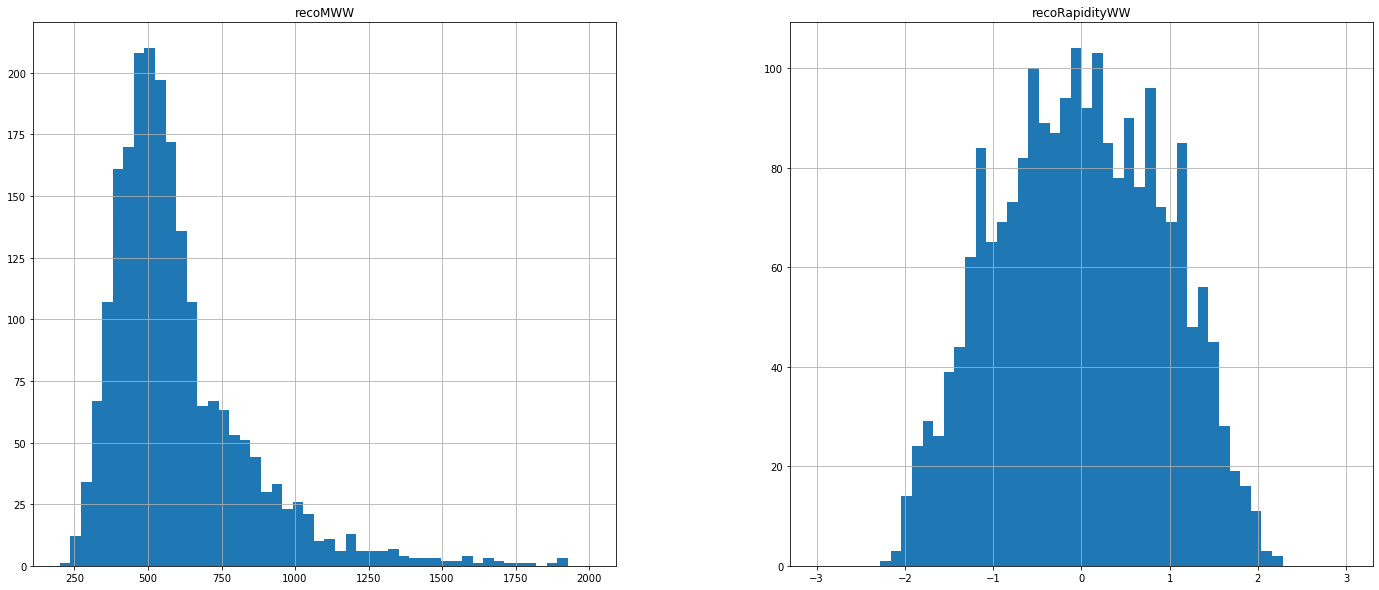

In [17]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_events.hist( "recoMWW", bins=50, range=(200.,2000.), ax=axes[0] )
df_protons_multiRP_events.hist( "recoRapidityWW", bins=50, range=(-3.,3.), ax=axes[1] )

In [18]:
#list( df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ) )
#df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: print( df_.iloc[0].xi, df_.iloc[1].xi ) ) 
df_protons_multiRP_events[ "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
df_protons_multiRP_events[ "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
df_protons_multiRP_events[ "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
df_protons_multiRP_events[ "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
df_protons_multiRP_events[ "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
df_protons_multiRP_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297411 205       316223040  0      218.068756  0.504739 -3.034295   
                 316433024  0      384.878784  2.095394  0.305777   
297101 370       500976032  0      331.734375 -0.850632  3.026100   
       505       668369216  0      206.841949 -2.248741 -1.192259   
297219 787       1425137280 0      209.280380  0.742523 -0.572275   
297050 403       500993152  0      228.137985 -0.510389  1.531566   
297178 697       870605696  0      224.234421  0.378060  0.127324   
297101 862       1071033536 0      206.248505 -1.086584  0.800201   
       911       1123641728 0      202.618423  1.455921 -3.055065   
297178 666       840800256  0      290.368500  0.004252 -1.859135   
       766       946702848  0      394.410339  1.042095 -2.047442   
298996 207       220344592  0      262.325012 -0.616909  1.228962   
297178 266       361288608  0      217.565414  0.739285 -0.035372   
297292 250       454772416  0      492.415619 -0.338664 -0.540008   
297219 119       246229344  0      273.319489  0.158944 -0.556130   
       123       254529536  0      415.990601  0.616110 -1.851164   
       212       432124288  0      262.587921 -0.914217 -1.383680   
297411 660       1099737600 0      291.814758 -2.147290 -0.635057   
297468 18        32808696   0      221.691528 -0.341072 -0.264875   
297292 150       279785600  0      444.686096 -0.009085  2.801576   
297296 333       477981696  0      511.862488 -0.350204  1.188340   
       409       579237184  0      233.925217  0.807464 -2.974219   
297178 7         9059698    0      260.169647  0.431214  3.046186   
       210       289156544  0      357.233063 -0.782804 -0.161058   
297411 467       754382080  0      312.454773  2.267957  2.610680   
       393       634553280  0      279.480164 -1.466843  0.352303   
297219 1486      2365754112 0      479.421509 -1.596118  2.546377   
297178 384       508421952  0      205.232498  2.275943  1.999862   
       224       307389504  0      231.635773 -0.105095 -2.165563   
       290       390949280  0      218.450882  1.611314 -2.366560   
...                                       ...       ...       ...   
305862 499       820050816  0      263.325714 -0.345153  2.471636   
       665       1097028224 0      215.062485  0.144782  1.940251   
305898 164       206041168  0      837.416260 -1.160865 -0.836556   
       181       237568352  0      226.264969  1.464836  0.720976   
       449       722691840  0      237.849411  0.517717 -1.899104   
       379       599388352  0      319.228149  1.209297  0.035705   
305064 253       419057344  0      202.067276 -0.376860 -1.698992   
305898 671       1097518976 0      384.597198  0.168629 -0.494380   
       694       1137197312 0      385.425323  0.019625 -0.172111   
305902 163       215091168  0      277.135071  0.546765  0.464101   
306125 44        75651944   0      222.678589  0.266193  2.869519   
305902 123       144969120  0      286.753510 -0.398693  2.522849   
       164       216719920  0      358.376007  1.538252  2.647400   
       275       412651200  0      237.590637 -0.299985 -2.535862   
       358       557093888  0      251.497910 -1.038303 -0.182105   
306092 405       760614208  0      209.995056  0.376752  0.415594   
305046 93        106393128  0      202.458557  0.335240 -2.961261   
305064 580       929028928  0      262.628937 -0.483522 -0.955638   
306048 26        49603400   0      438.131042 -1.475195 -1.460356   
306030 38        76541464   0      226.591766 -0.178814  1.954550   
306135 1072      1931327232 0      273.112976 -0.895130  2.069661   
305046 115       130269968  0      325.537567  0.405862 -2.619751   
306125 2403      3555737088 0      391.585632  1.907020 -1.042255   
306139 24        20476824   0      262.176971  2.185755  2.396373   
305252 162       200564864  0      205.837509 -0.701591 -1.014871   
306092 361       680397120  0      2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9abd10390>],
      dtype=object)

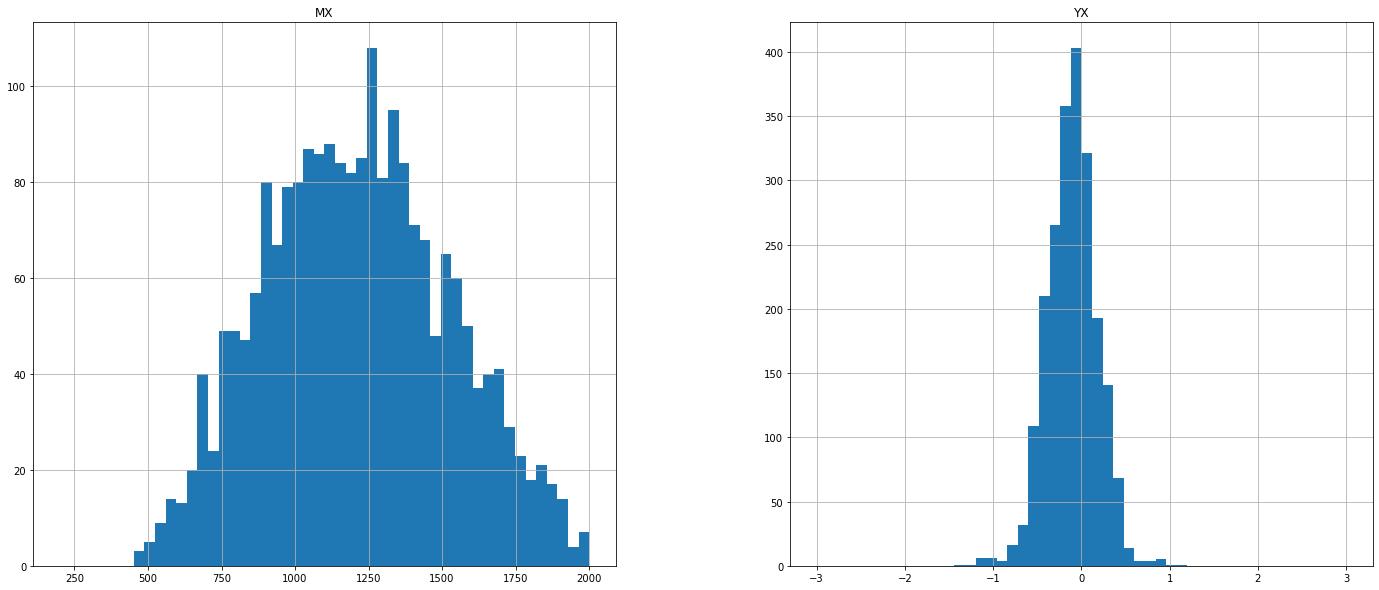

In [19]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_events.hist( "MX", bins=50, range=(200.,2000.), ax=axes[0] )
df_protons_multiRP_events.hist( "YX", bins=50, range=(-3.,3.), ax=axes[1] )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9abb7b9d0>],
      dtype=object)

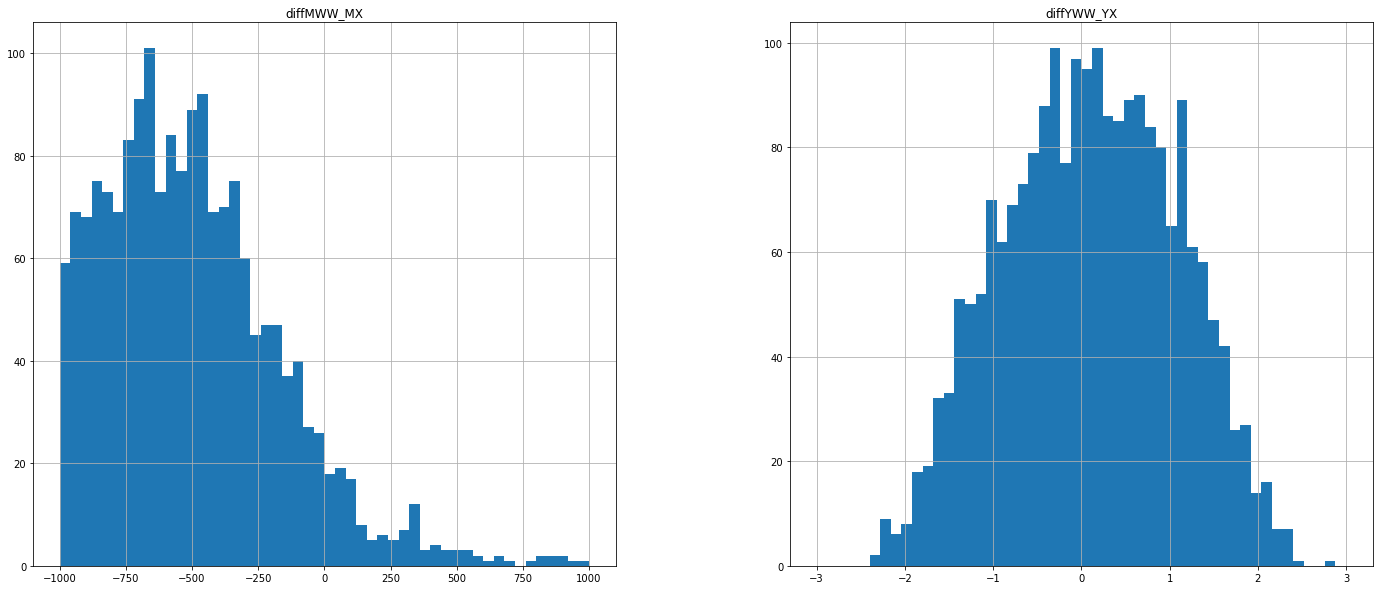

In [20]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_events.hist( "diffMWW_MX", bins=50, range=(-1000.,1000.), ax=axes[0] )
df_protons_multiRP_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), ax=axes[1] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a2f38250>]],
      dtype=object)

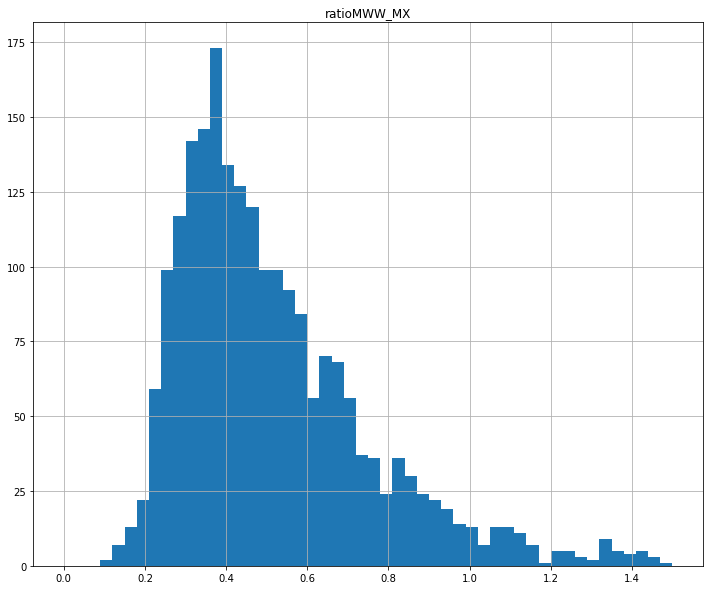

In [21]:
df_protons_multiRP_events.hist( "ratioMWW_MX", bins=50, range=(0.,1.5), figsize=(12,10) )

(-3.0, 3.0)

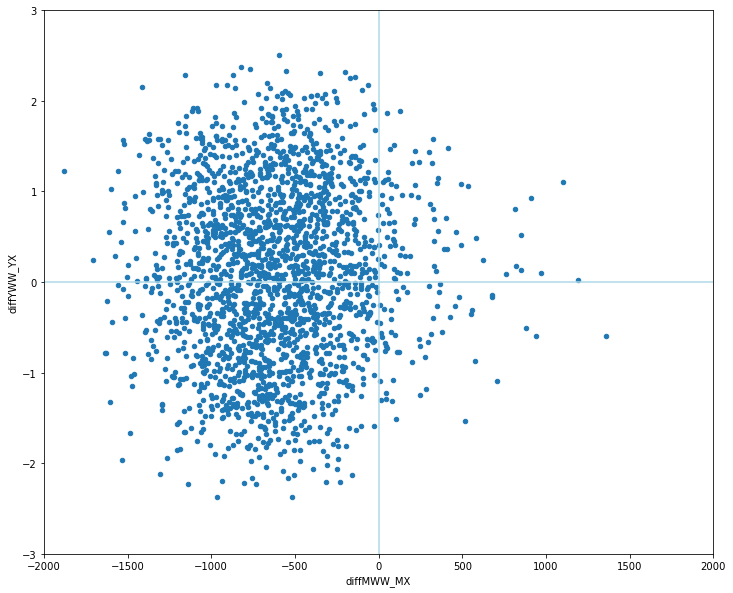

In [22]:
fig = plt.figure( figsize=(12,10) )
plt.plot( (-2000.,2000.), (0.,0.), color='lightblue' )
plt.plot( (0.,0.), (-3.,3.), color='lightblue' )
ax = plt.gca()
df_protons_multiRP_events.plot( "diffMWW_MX", "diffYWW_YX", 'scatter', ax=ax )
plt.xlim(-2000., 2000.)
plt.ylim(-3., 3.)

In [23]:
df_protons_singleRP

,run,lumiblock,event,slice,xi,thx,thy,t,ismultirp,rpid,...,num_jets_ak4,pfcand_nextracks,pfcand_nextracks_noDRl,recoMWhad,recoMWlep,recoMWW,recoRapidityWW,dphiWW,WLeptonicPt,WLeptonicPhi
0,297411,205,316223040,0,0.108474,0.0,-1.504139e-05,-0.020134,0,3,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
1,297411,205,316223040,0,0.108059,0.0,-1.569327e-05,-0.020799,0,23,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
2,297411,205,316223040,0,0.088566,0.0,-5.547850e-05,-0.126095,0,103,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
3,297411,205,316223040,0,0.082378,0.0,-5.934368e-05,-0.143040,0,123,...,0,44,44,51.710030,89.465797,459.885132,0.229370,-3.034591,201.999725,0.214299
4,297411,205,316433024,0,0.047717,0.0,-9.486378e-05,-0.364174,0,3,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
5,297411,205,316433024,0,0.047727,0.0,-1.046544e-04,-0.442764,0,23,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
6,297411,205,316433024,0,0.047222,0.0,-2.045062e-05,-0.018895,0,103,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
7,297411,205,316433024,0,0.045951,0.0,-1.408363e-05,-0.009942,0,123,...,2,48,48,107.354317,0.630821,870.389954,1.395311,-2.860727,268.751251,-2.554949
8,297101,370,500976032,0,0.087486,0.0,-7.064360e-05,-0.199783,0,3,...,2,33,33,64.725227,82.970459,907.498291,0.004048,2.883685,301.053406,-0.373399
9,297101,370,500976032,0,0.089118,0.0,-7.055031e-05,-0.199223,0,23,...,2,33,33,64.725227,82.970459,907.498291,0.004048,2.883685,301.053406,-0.373399


In [24]:
df_protons_singleiRP_index = df_protons_singleRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )
df_protons_singleiRP_index

xi  thx           thy         t  \
run    lumiblock event      slice                                          
297411 205       316223040  0      0.108474  0.0 -1.504139e-05 -0.020134   
                            0      0.108059  0.0 -1.569327e-05 -0.020799   
                            0      0.088566  0.0 -5.547850e-05 -0.126095   
                            0      0.082378  0.0 -5.934368e-05 -0.143040   
                 316433024  0      0.047717  0.0 -9.486378e-05 -0.364174   
                            0      0.047727  0.0 -1.046544e-04 -0.442764   
                            0      0.047222  0.0 -2.045062e-05 -0.018895   
                            0      0.045951  0.0 -1.408363e-05 -0.009942   
297101 370       500976032  0      0.087486  0.0 -7.064360e-05 -0.199783   
                            0      0.089118  0.0 -7.055031e-05 -0.199223   
                            0      0.078594  0.0 -5.923190e-05 -0.142479   
                            0      0.076931  0.0 -5.824285e-05 -0.137937   
       505       668369216  0      0.132105  0.0 -2.434822e-05 -0.039430   
                            0      0.132672  0.0 -2.461507e-05 -0.040059   
                            0      0.132589  0.0 -9.046322e-06 -0.020831   
                            0      0.133238  0.0 -7.837677e-06 -0.020270   
297219 787       1425137280 0      0.127903  0.0 -7.204179e-05 -0.207736   
                            0      0.129348  0.0 -7.001716e-05 -0.197243   
                            0      0.079637  0.0 -1.677439e-05 -0.017004   
                            0      0.079553  0.0 -1.353199e-05 -0.013171   
297050 403       500993152  0      0.135455  0.0  1.113961e-04 -0.471940   
                            0      0.135849  0.0  1.115940e-04 -0.473461   
                            0      0.090587  0.0 -4.056229e-05 -0.071156   
                            0      0.095069  0.0 -3.681366e-05 -0.060603   
297178 697       870605696  0      0.038426  0.0 -1.202048e-04 -0.588371   
                            0      0.036216  0.0 -1.396190e-04 -0.794969   
                            0      0.123786  0.0 -7.312407e-05 -0.213337   
                            0      0.122550  0.0 -7.271196e-05 -0.211062   
297101 862       1071033536 0      0.103202  0.0 -5.931202e-06 -0.011782   
                            0      0.104182  0.0 -5.674456e-06 -0.011879   
...                                     ...  ...           ...       ...   
306125 2403      3555737088 0      0.083189  0.0 -6.444719e-05 -0.167526   
                            0      0.083710  0.0 -6.308418e-05 -0.160792   
306139 24        20476824   0      0.084931  0.0 -1.083317e-05 -0.011473   
                            0      0.085980  0.0 -1.145882e-05 -0.012187   
                            0      0.145620  0.0  1.991157e-05 -0.036149   
                            0      0.144863  0.0  2.127480e-05 -0.037944   
305252 162       200564864  0      0.102318  0.0 -1.374997e-05 -0.017431   
                            0      0.103113  0.0 -1.277218e-05 -0.016612   
                            0      0.056900  0.0  3.832395e-05 -0.061543   
                            0      0.059302  0.0  4.025502e-05 -0.067694   
306092 361       680397120  0      0.109607  0.0  2.570363e-05 -0.036725   
                            0      0.110847  0.0  2.572405e-05 -0.037017   
                            0      0.079068  0.0  8.535532e-06 -0.008808   
                            0      0.083229  0.0  1.003332e-05 -0.010547   
       381       715986240  0      0.067769  0.0  4.402847e-05 -0.080686   
                            0      0.068199  0.0  4.375102e-05 -0.079749   
                            0      0.175065  0.0  7.000290e-05 -0.203484   
                            0      0.175651  0.0  7.067320e-05 -0.206889   
       230       428336032  0      0.055552  0.0  3.578093e-05 -0.053962   
                            0      0.053371  0.0  3.716991e-05 -0.057905   
             

In [25]:
df_ppstracks

,run,lumiblock,event,slice,x,y,rpid
0,297411,205,316223040,0,13.161860,4.510451e+00,3
1,297411,205,316223040,0,7.796552,5.682672e+00,103
2,297411,205,316223040,0,51.537666,4.244207e+00,23
3,297411,205,316223040,0,46.737091,5.576784e+00,123
4,297411,205,316433024,0,7.544739,4.733057e+00,3
5,297411,205,316433024,0,5.402908,3.931887e+00,103
6,297411,205,316433024,0,45.978149,4.704774e+00,23
7,297411,205,316433024,0,44.701096,3.708344e+00,123
8,297101,370,500976032,0,11.442026,6.176211e+00,3
9,297101,370,500976032,0,7.612419,5.408221e+00,103


In [26]:
df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
#df_ppstracks_index
df_ppstracks_index[ ( df_ppstracks_index.rpid != 16 ) & ( df_ppstracks_index.rpid != 116 ) ]

x         y  rpid
run    lumiblock event      slice                           
297411 205       316223040  0      13.161860  4.510451     3
                            0       7.796552  5.682672   103
                            0      51.537666  4.244207    23
                            0      46.737091  5.576784   123
                 316433024  0       7.544739  4.733057     3
                            0       5.402908  3.931887   103
                            0      45.978149  4.704774    23
                            0      44.701096  3.708344   123
297101 370       500976032  0      11.442026  6.176211     3
                            0       7.612419  5.408221   103
                            0      50.038467  6.117944    23
                            0      46.842014  5.303416   123
       505       668369216  0      16.028858  5.419114     3
                            0      11.146255  4.315462   103
                            0      54.520702  5.207718    23
                            0      50.408752  4.091079   123
297219 787       1425137280 0      16.204500  8.438501     3
                            0       8.104057  4.211336   103
                            0      54.828094  8.332294    23
                            0      47.444653  3.977894   123
297050 403       500993152  0      15.889695 -4.042765     3
                            0       7.831249  5.180376   103
                            0      54.323654 -4.887363    23
                            0      47.381531  5.104558   123
297178 697       870605696  0       7.006719  4.457753     3
                            0      11.279790  8.181603   103
                            0      45.244946  4.326964    23
                            0      50.498589  8.209529   123
297101 862       1071033536 0      13.390796  4.046581     3
                            0       9.889711  3.196313   103
...                                      ...       ...   ...
306125 2403      3555737088 0      45.263168  3.508112    23
                            0      48.352695  5.082924   123
306139 24        20476824   0      12.562693 -0.943291     3
                            0      14.190883  1.580879   103
                            0      50.518238  3.103970    23
                            0      53.253166  1.089530   123
305252 162       200564864  0      14.411287 -0.683488     3
                            0       7.443138 -1.276126   103
                            0      52.341476  3.315634    23
                            0      46.386467  2.032084   123
306092 361       680397120  0      14.270398  1.240781     3
                            0       8.909599 -1.290324   103
                            0      52.784256  1.298160    23
                            0      47.842960  2.498874   123
       381       715986240  0      10.227793 -0.258150     3
                            0      13.686355  7.745934   103
                            0      48.390789  1.623417    23
                            0      54.481396 -5.294062   123
       230       428336032  0       9.203940 -1.000007     3
                            0      12.082043  7.490014   103
                            0      46.949291  2.112299    23
                            0      52.954693 -5.590511   123
       666       1220960128 0       9.001460 -0.048587     3
                            0      14.213093 -0.832446   103
                            0      46.938103  1.064929    23
                            0      53.055988  3.595257   123
       343       647364928  0      10.526566 -2.384033     3
                            0      10.457870 -1.060397   103
                            0      48.107605  4.092021    23
                            0      49.152359  2.695959   123

[8652 rows x 3 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a26a0650>],
      dtype=object)

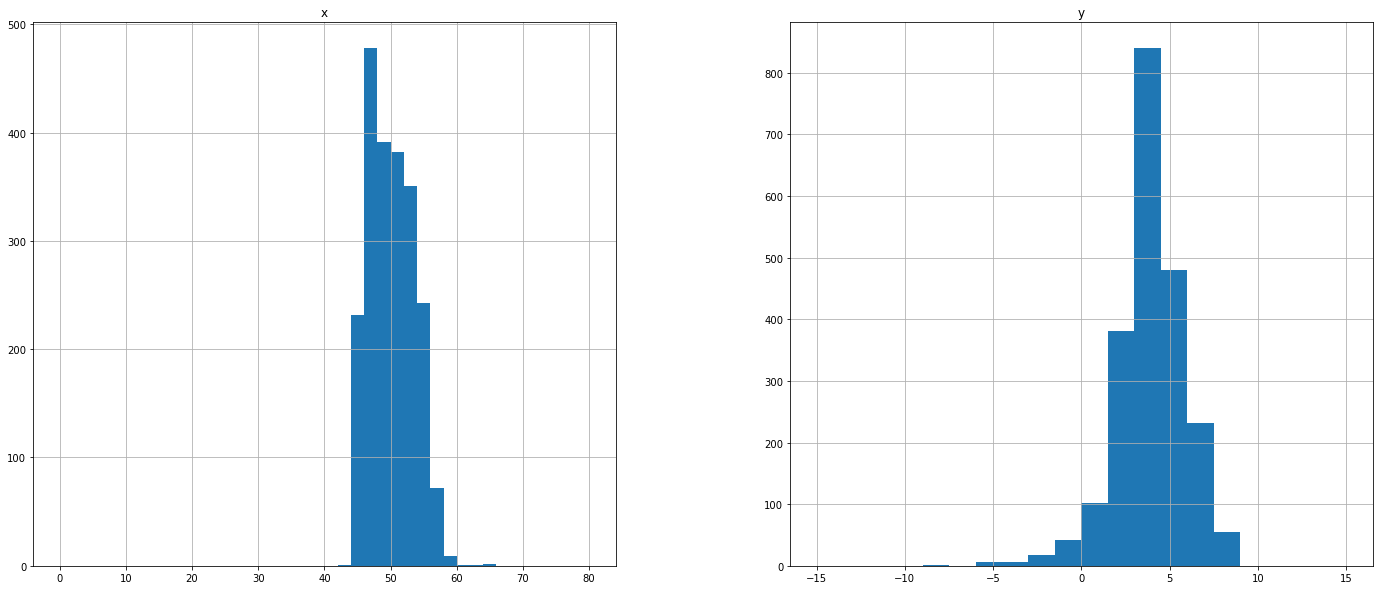

In [37]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_ppstracks[ df_ppstracks.rpid == 23 ].hist( "x", bins=40, range=(0.,80.), ax=axes[0] )
df_ppstracks[ df_ppstracks.rpid == 23 ].hist( "y", bins=20, range=(-15.,15.), ax=axes[1] )

### References

In [28]:
np.info( ak.concatenate )

 concatenate(arrays, axis=0, mergebool=True, highlevel=True)

Args:
    arrays: Arrays to concatenate along any dimension.
    axis (int): The dimension at which this operation is applied. The
        outermost dimension is `0`, followed by `1`, etc., and negative
        values count backward from the innermost: `-1` is the innermost
        dimension, `-2` is the next level up, etc.
    mergebool (bool): If True, boolean and nummeric data can be combined
        into the same buffer, losing information about False vs `0` and
        True vs `1`; otherwise, they are kept in separate buffers with
        distinct types (using an #ak.layout.UnionArray8_64).
    highlevel (bool): If True, return an #ak.Array; otherwise, return
        a low-level #ak.layout.Content subclass.

Returns an array with `arrays` concatenated. For `axis=0`, this means that
one whole array follows another. For `axis=1`, it means that the `arrays`
must have the same lengths and nested lists are each concatenated,

In [29]:
np.info( pd.DataFrame.hist )

 hist_frame(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None,
            ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False,
            figsize=None, layout=None, bins=10, **kwds)

Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : string or sequence
    If passed, will be used to limit data to a subset of columns.
by : object, optional
    If passed, then used to form histograms for separate groups.
grid : boolean, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    Rotation of x axis labels. For example, a value of 90 displays the
 

In [30]:
np.info( pd.DataFrame.plot.scatter )

 scatter(self, x, y, s=None, c=None, **kwds)

Create a scatter plot with varying marker point size and color.

The coordinates of each point are defined by two dataframe columns and
filled circles are used to represent each point. This kind of plot is
useful to see complex correlations between two variables. Points could
be for instance natural 2D coordinates like longitude and latitude in
a map or, in general, any pair of metrics that can be plotted against
each other.

Parameters
----------
x : int or str
    The column name or column position to be used as horizontal
    coordinates for each point.
y : int or str
    The column name or column position to be used as vertical
    coordinates for each point.
s : scalar or array_like, optional
    The size of each point. Possible values are:

    - A single scalar so all points have the same size.

    - A sequence of scalars, which will be used for each point's size
      recursively. For instance, when passing [2,14] all points size
 

In [31]:
np.info( plt.plot )

 plot(*scalex, **scaley)

Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      li